In [225]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [226]:
df1 = pd.read_csv('WCrankings')
df2 = pd.read_csv('WCmatches')

#reading in the csv files which the tables were written into 

In [227]:
df1['Squad'] = df1['Squad'].str.split(n=1).str[1]
df1.loc[25, 'Squad'] = 'Iran'

#formatting change to clean up how the country names are shown 

df1.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Top Team Scorer,Goalkeeper
0,1,Argentina,7.0,4.0,2.0,1.0,15.0,8.0,7.0,14.0,15.1,4.6,10.4,1.49,Lionel Messi - 7,Emiliano Martínez
1,2,France,7.0,5.0,1.0,1.0,16.0,8.0,8.0,16.0,13.8,9.9,3.9,0.55,Kylian Mbappé - 8,Hugo Lloris
2,3,Croatia,7.0,2.0,4.0,1.0,8.0,7.0,1.0,10.0,7.0,11.0,-4.0,-0.58,Andrej Kramarić - 2,Dominik Livaković
3,4,Morocco,7.0,3.0,2.0,2.0,6.0,5.0,1.0,11.0,6.6,7.4,-0.8,-0.12,Youssef En-Nesyri - 2,Yassine Bounou
4,QF,Netherlands,5.0,3.0,2.0,0.0,10.0,4.0,6.0,11.0,4.6,6.1,-1.5,-0.29,Cody Gakpo - 3,Andries Noppert


In [228]:
px.treemap(data_frame = df1, path = ['Squad'], values = 'GF')

From this tree map chart, it can be seen the top scorers in the tournament were both of the finalists France and Argentina, which should come as no surprise.

In [229]:
fig = px.bar(df1, x = 'Squad', y = 'xGD/90')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


Germany generated the highest xG difference against their opponents, which is a surprise given their group stage exit, suggesting they were let down by their finishing in front of goal.

In [230]:
df1['Goals scored per xG'] = (df1['GF']/df1['xG']).round(2)
df1['Goals against per xG'] = (df1['GA']/df1['xGA']).round(2)
df1['xG differential'] = (df1['Goals scored per xG'] - df1['Goals against per xG'])
#creating new columns which are calculated using the existing columns 

In [231]:
df1 = df1.sort_values('xG differential')
#ordering dataframe by how clinical teams were in comparison to their opponents 

y = df1['Squad']
x_f = df1['Goals scored per xG']
x_a = df1['Goals against per xG']
#assigning variables for the dumbell chart


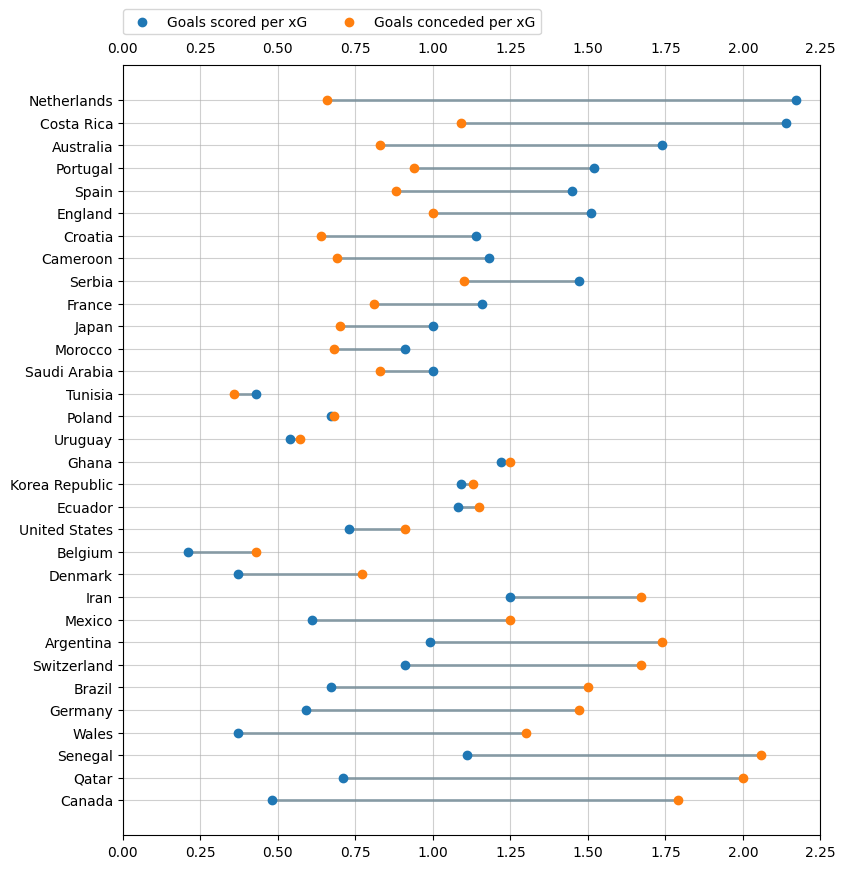

In [232]:
fig, ax = plt.subplots(figsize = (9, 10))

ax.set_xlim(0,2.25)
#setting the xaxis range

ax.scatter(x_f, y, zorder = 3)
ax.scatter(x_a, y, zorder = 3)
#plotting the variables 

ax.hlines(y, x_f, x_a, color = '#758D99', linewidth = 2, alpha = 0.8, zorder = 2)
#plotting a connecting line between the two x axis variables 

ax.xaxis.set_tick_params(labeltop = True)
#adding an x axis label at the top of the chart to make it easier to read values at the top 

ax.legend(['Goals scored per xG', 'Goals conceded per xG'], ncol = 2, loc = [0, 1.04])
#creating a legend and placing it just above the chart 

ax.grid(which = 'major', axis = 'both', alpha = 0.6, zorder = 1)
#adding grid lines to make reading the chart easier 

This dumbell chart shows how clinical each team was compared to their opponents. Netherlands were the standout overperformers in comparison to their opponents, while Canada were standout underperformers.

In [233]:
df2.head()

,Round,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,Group stage,1.0,Sun,2022-11-20,19:00,Qatar qa,0.3,0–2,1.2,ec Ecuador,67372.0,Al Bayt Stadium (Neutral Site),Daniele Orsato,Match Report,NaN
1,Group stage,1.0,Mon,2022-11-21,16:00,England eng,2.1,6–2,1.4,ir IR Iran,45334.0,Khalifa International Stadium (Neutral Site),Raphael Claus,Match Report,NaN
2,Group stage,1.0,Mon,2022-11-21,19:00,Senegal sn,0.9,0–2,0.7,nl Netherlands,41721.0,Al Thumama Stadium (Neutral Site),Wilton Sampaio,Match Report,NaN
3,Group stage,1.0,Mon,2022-11-21,22:00,United States us,0.8,1–1,1.5,wls Wales,43418.0,Ahmed bin Ali Stadium (Neutral Site),Abdulrahman Ibrahim Al Jassim,Match Report,NaN
4,Group stage,1.0,Tue,2022-11-22,13:00,Argentina ar,2.2,1–2,0.1,sa Saudi Arabia,88012.0,Lusail Iconic Stadium (Neutral Site),Slavko Vinčič,Match Report,NaN


In [234]:
df2['Total goals'] = ''
#creating a new column to which values will be assigned 

row_num = len(df2)
#setting a variable equal to the number of rows in the dataframe, this is useful for looping through each row 

for i in range(row_num):
    string = df2.loc[i, 'Score']
    dash_loc = string.rfind('–')
    #locating the position of the dash in each scoreline

    num1 = int(string[dash_loc - 1])
    num2 = int(string[dash_loc + 1])
    goals = num1 + num2
    #location the numbers before and after the dash, converting them to integers, then adding them together to get the total number of goals in each match 

    df2.loc[i, 'Total goals'] = goals
    #assigning the calculated value to the new column which was previously created 

In [235]:
df2_sorted = df2.sort_values('Total goals', ascending = False).head(12)
df2_sorted['Home'] = df2_sorted['Home'].str.split(n=1).str[0]
df2_sorted['Away'] = df2_sorted['Away'].str.split(n=1).str[1]
df2_sorted.loc[1, 'Away'] = 'Iran'

#formatting change to clean up how the country names are shown 

df2_sorted['Fixture'] = df2_sorted['Home'] + ' v ' + df2_sorted['Away']

#creating a new column which lists the fixture in a readable format 

In [236]:
fig = go.Figure(go.Bar(
            x= df2_sorted['Total goals'],
            y= df2_sorted['Fixture'],
            orientation='h'))

#plotting a horizontal bar chart 

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
#showing the scorelines with the highest scoring games at the top 

fig.update_traces(hovertemplate= df2_sorted['Score'] + "<extra></extra>", marker_color = 'purple')
#when hovering over each bar, the scoreline will be shown 

fig.show()

The highest scoring game in the tournament was England's 6-2 win over Iran.

In [237]:
df2.loc[:, 'Venue'] = df2.loc[:, 'Venue'].str.replace(' (Neutral Site)','')
#removing the unnecessary words from each stadium name 

In [238]:
df3 = df2['Venue'].value_counts().rename_axis('Venue').reset_index(name='Goals per game')
#obtaining the stadium names and writing the result to a new dataframe 

In [239]:
for i in range(len(df3)):
    string = df3.loc[i, 'Venue']
    #iterating through each stadium name 

    goals = df2.loc[df2['Venue'] == string, 'Total goals'].sum()
    games = len(df2[df2['Venue'] == string])
    ratio = round(goals/games, 2)
    #finding the overall goals to game ratio for all the matches played in each stadium 

    df3.loc[i, 'Goals per game'] = ratio
    #writng the result to the previously created dataframe 
    
df3 = df3.sort_values('Goals per game', ascending = False)
df3

/var/folders/26/3bsy9m654g7_jnybrj3390640000gn/T/ipykernel_24747/2396096122.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,Venue,Goals per game
2,Khalifa International Stadium,3.88
0,Lusail Iconic Stadium,3.30
3,Al Thumama Stadium,3.00
6,Stadium 974,3.00
7,Al Janoub Stadium,2.57
1,Al Bayt Stadium,2.22
5,Ahmed bin Ali Stadium,1.71
4,Education City Stadium,1.62


In [240]:
fig = go.Figure([go.Bar(x= df3['Venue'], y= df3['Goals per game'])])
fig.update_traces(marker_color='orange')
fig.show()
#plotting the goals per game for every stadium

Spectators at Khalifa International Stadium saw on average the highets number of goals per game, while spectators at Education Ctiy Stadium saw the least.